In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
np.random.seed(10)

In [2]:
#reading file from csv
df = pd.read_csv("marketing_campaign.csv", sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


<b>Notes about columns </b> <br><br>
People

ID: Customer's unique identifier <br>
Year_Birth: Customer's birth year <br>
Education: Customer's education level<br>
Marital_Status: Customer's marital status<br>
Income: Customer's yearly household income<br>
Kidhome: Number of children in customer's household<br>
Teenhome: Number of teenagers in customer's household<br>
Dt_Customer: Date of customer's enrollment with the company<br>
Recency: Number of days since customer's last purchase<br>
Complain: 1 if customer complained in the last 2 years, 0 otherwise<br>

Products<br>

MntWines: Amount spent on wine in last 2 years<br>
MntFruits: Amount spent on fruits in last 2 years<br>
MntMeatProducts: Amount spent on meat in last 2 years<br>
MntFishProducts: Amount spent on fish in last 2 years<br>
MntSweetProducts: Amount spent on sweets in last 2 years<br>
MntGoldProds: Amount spent on gold in last 2 years<br>

Promotion<br>

NumDealsPurchases: Number of purchases made with a discount<br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br>

Place<br>

NumWebPurchases: Number of purchases made through the company’s web site<br>
NumCatalogPurchases: Number of purchases made using a catalogue<br>
NumStorePurchases: Number of purchases made directly in stores<br>
NumWebVisitsMonth: Number of visits to company’s web site in the last month<br>

In [3]:
#checking columns
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df.shape

(2240, 29)

Dataset has 2240 rows and 29 columns

<h3 style = "text-align:center" >Data Exploration and Cleaning</h3>

In [5]:
#checking null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Income column has 24 null values, we will fill them later

In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Dt_Customer is currently an object, we will convert it to DateTime so that we can get year as a separate column and check how many years passed since the customers' first transaction

In [7]:
#checking unique values of the variables
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Z_CostContact and Z_Revenue columns has only 1 value, we will drop them because they won't affect the outcome of the model

In [8]:
#dropping both of these columns
df.drop(columns=['Z_CostContact','Z_Revenue'], inplace =True)

For readibility purposes I will rename some of the columns

In [9]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [10]:
#inspecting marital status of customers
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Now I will change values in Marital_Status column to include either Single or Couple 

In [11]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married':'Couple',
    'Together':'Couple',
    'Divorced':'Single',
    'Widow':'Single',
    'Alone':'Single',
    'YOLO': 'Single',
    'Absurd':'Single'
})
df['Marital_Status'].value_counts()

Couple    1444
Single     796
Name: Marital_Status, dtype: int64

Now I will change year birth column to age to get the customer age

In [12]:
df['Customer_Age'] = 2021 - df['Year_Birth']

In [13]:
#Dropping Year_Birth column
df.drop(['Year_Birth'], axis=1,inplace=True)

In [14]:
df.describe()

,ID,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,52.194196
std,3246.662198,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,2828.250000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000
75%,8427.750000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,128.000000


<b>Findings</b>

Income has possible outliers. <br>
Other outliers in columns related to amount spent, purchases and visits will be ignored.<br>
Max customer age is 128, which is quite possibly a mistake that we should correct.<br>

In [15]:
#filling null values in income column with the income mean
df['Income'].fillna(df['Income'].mean(),inplace=True)

In [16]:
#converting Dt_Customer to DateTime 
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [17]:
#how many years passed since customers' first purchase
df['Years_Since_First_Purchase'] = 2021-pd.DatetimeIndex(df['Dt_Customer']).year

In [18]:
df.drop(['Dt_Customer'],axis=1,inplace=True)

In [19]:
df['Years_Since_First_Purchase'].unique()

array([9, 7, 8], dtype=int64)

Not a significant difference between the values which means we can drop this column

In [20]:
df.drop(['Years_Since_First_Purchase'],axis=1,inplace=True)

In [21]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [22]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Now we will simplify values in Education column

In [23]:
df['Education'] = df['Education'].replace({
    'Basic':'Undergraduate',
    '2n Cycle':'Undergraduate',
    'Graduation':'Graduate',
    'Master':'Postgraduate',
    'PhD':'Postgraduate'
})
df['Education'].value_counts()

Graduate         1127
Postgraduate      856
Undergraduate     257
Name: Education, dtype: int64

In [24]:
df.Complain.value_counts()

0    2219
1      21
Name: Complain, dtype: int64

Only 21 complaints which will skew our model

We will set ID as index, since it isn't a feature for our model

In [25]:
df.set_index('ID',inplace=True)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age
ID,,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64
2174,Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67
4141,Graduate,Couple,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56
6182,Graduate,Couple,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37
5324,Postgraduate,Couple,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40


Now we will create a new column which tells us how many times customers accepted a campaign offer

In [26]:
df['Total_Accepted'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['Total_Accepted'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [27]:
df['Total_Accepted'].value_counts()

0    1777
1     325
2      83
3      44
4      11
Name: Total_Accepted, dtype: int64

I will create a column which refers to total number of children

In [28]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df.Children.value_counts()

1    1128
0     638
2     421
3      53
Name: Children, dtype: int64

I will create a new column called family members which will give us the number of people living in a house

In [29]:
df["Family_Members"] = df["Marital_Status"].replace({"Single": 1, "Couple":2}) + df["Children"]
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,Total_Accepted,Children,Family_Members
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,0,1
2174,Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,0,2,3
4141,Graduate,Couple,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,0,2
6182,Graduate,Couple,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,0,1,3
5324,Postgraduate,Couple,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,0,1,3


Finally, I will create another column called expenses which is the total of amount spent on all the products

In [30]:
df['Expenses'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish']+ df['Sweets']+df['Gold']
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,Total_Accepted,Children,Family_Members,Expenses
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,0,1,1617
2174,Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,0,2,3,27
4141,Graduate,Couple,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,0,2,776
6182,Graduate,Couple,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,0,1,3,53
5324,Postgraduate,Couple,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,0,1,3,422


In [31]:
#finding outliers in customer age column
df['Customer_Age'].sort_values(ascending=False)

ID
11004    128
1150     122
7829     121
6663      81
6932      80
        ... 
8315      26
10548     26
5184      26
193       25
9909      25
Name: Customer_Age, Length: 2240, dtype: int64

In [32]:
df=df[df['Customer_Age']<95]
df.shape

(2237, 29)

We removed three rows where age was higher than 95

In [33]:
#finding outliers in income column
df.Income.sort_values(ascending=False).head(10)

ID
9432     666666.0
1503     162397.0
1501     160803.0
5336     157733.0
8475     157243.0
4931     157146.0
11181    156924.0
5555     153924.0
4619     113734.0
4611     105471.0
Name: Income, dtype: float64

Looks like we've got a huge outlier at the top

In [34]:
#Removing the outliers in the income column
df=df[df.Income<150000]
df.shape

(2229, 29)

Now I will create a column which tells us if a campaign offer was accepted or not.

In [35]:
#Copying the Total_Accepted column
df['Accepted_Or_Not'] = df['Total_Accepted']
#Converting the values, if they are not 0, change them to 1
df.loc[df['Accepted_Or_Not']!=0,'Accepted_Or_Not'] = 1

In [36]:
df['Accepted_Or_Not'].value_counts()

0    1767
1     462
Name: Accepted_Or_Not, dtype: int64

<h3 style = "text-align:center" >Exploratory Data Analysis</h3>

We have only 2 categorical variables. Still we will separate them and try to find useful insights using graphs.

In [37]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,Total_Accepted,Children,Family_Members,Expenses,Accepted_Or_Not
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,0,1,1617,0
2174,Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,0,2,3,27,0
4141,Graduate,Couple,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,0,2,776,0
6182,Graduate,Couple,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,0,1,3,53,0
5324,Postgraduate,Couple,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,0,1,3,422,0


In [38]:
#Separating categorical variables
categorical = ['Education','Marital_Status']

In [39]:
#importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns


<b> Visualisation of categorical variables </b>

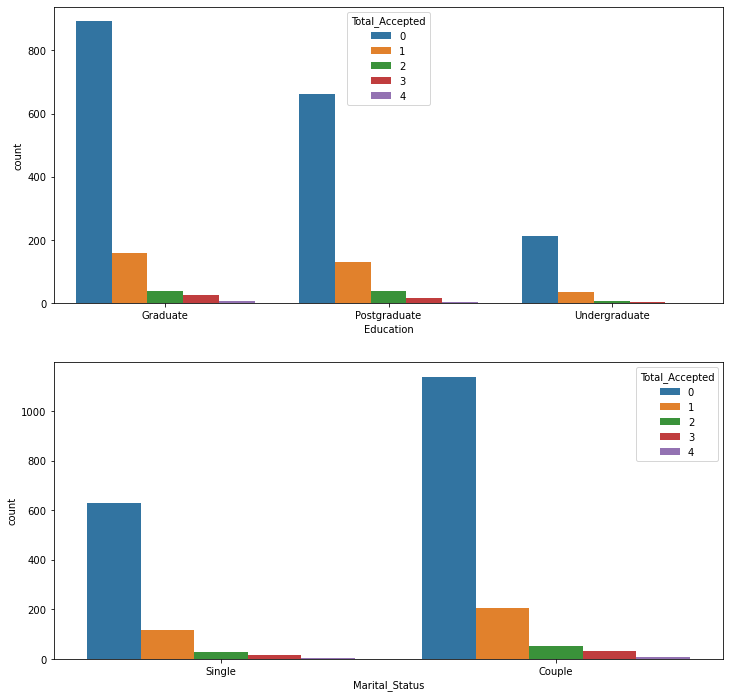

In [40]:
#Relationship between categorical variables and number of accepted campaigns
i = 1
plt.figure(figsize=(12,12)) 
for variable in categorical[::]:
    plt.subplot(2, 1, i)
    sns.countplot(x=df[variable], hue=df.Total_Accepted)
    i += 1
    
plt.show()

When we look at these graphs, nothing stands out blatantly so I will look at the percentages in pie charts for each of these variables to see whether we can extract useful information.

In [41]:
df2 = df[['Total_Accepted','Education']]

In [42]:
#Getting the mean Total_Accepted for each category in education
df3=df2.groupby('Education')['Total_Accepted'].mean()
df3

Education
Graduate         0.305160
Postgraduate     0.312941
Undergraduate    0.223529
Name: Total_Accepted, dtype: float64

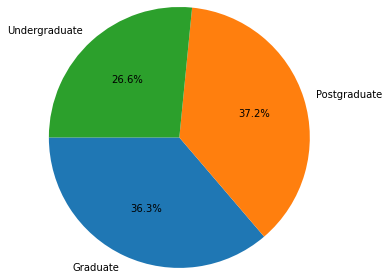

In [43]:
# Pie chart for the table above
plt.pie(df3,labels=df3.index,autopct= '%0.1f%%',startangle = 180,radius =1.5, normalize=True)
plt.show()

People with basic level of education accepts the campaigns less. People with better education are more likely to accept campaign offers.

<b> Visualisation of numerical variables </b>

In [44]:
#numerical variables that we will use for plotting
variables = ['Customer_Age', 'Income', 'Recency', 'Children','Family_Members','Expenses']

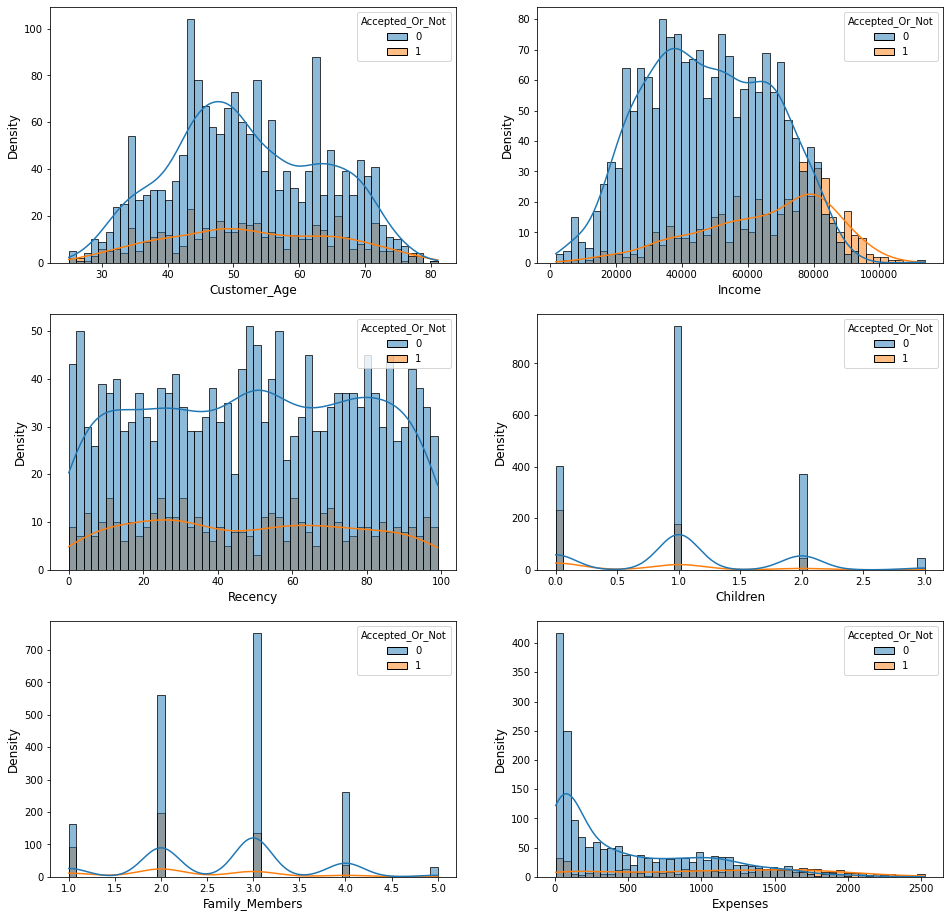

In [45]:
#Relationship between some of the numerical variables and rejected/accepted offer
i = 1
plt.figure(figsize=(16,16)) 
for variable in variables:
    plt.subplot(3, 2, i)
    sns.histplot(x=df[variable],kde=True,bins=50, hue=df.Accepted_Or_Not)
    plt.xlabel(variable,size=12)
    plt.ylabel("Density",size=12)
    i += 1
    
plt.show()

As the income increases until around 80000, accepted offers increase as well.

Children graph suggests that gap between accepted and rejected is close when there is no children.

Recency graph shows that customers tend to reject the offer when the amount of days passed since last purchase increases.

People with low expenses are less likely to accept the offer.

In [46]:
purchases = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

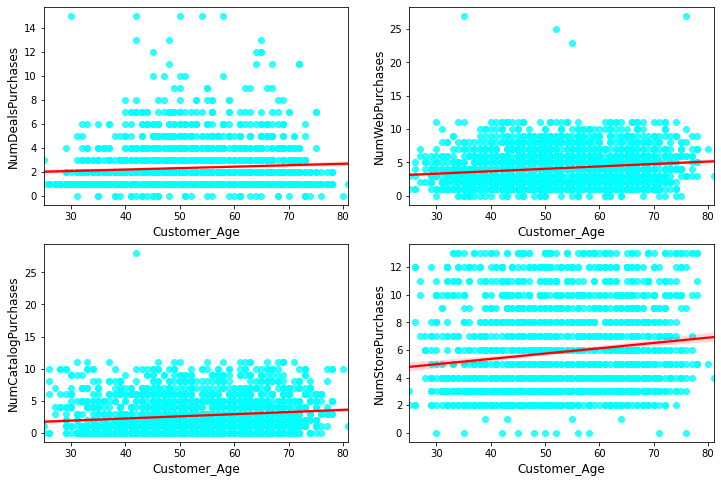

In [47]:
#Relationship between customer age and platform used in purchases
i = 1
plt.figure(figsize=(12,8)) 
for variable in purchases:
    plt.subplot(2, 2, i)
    sns.regplot(x=df['Customer_Age'], y=df[variable],scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
    plt.xlabel('Customer_Age',size=12)
    plt.ylabel(variable,size=12)
    i += 1
    
plt.show()

Looking at the scatter plots and regression lines, only finding we can highlight is that older people tend to purchase in store more. All other variables are too close to say anything meaningful.

<AxesSubplot:xlabel='Recency', ylabel='NumWebVisitsMonth'>

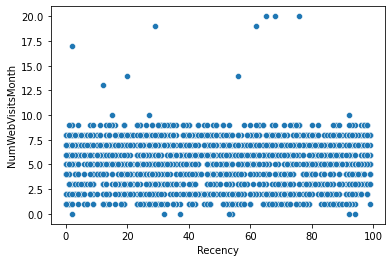

In [48]:
#scatter plot between recency and number of visits made in a month
sns.scatterplot(x=df['Recency'], y=df['NumWebVisitsMonth'])

Recent purchases are not correlated to number of website visits made in last month 

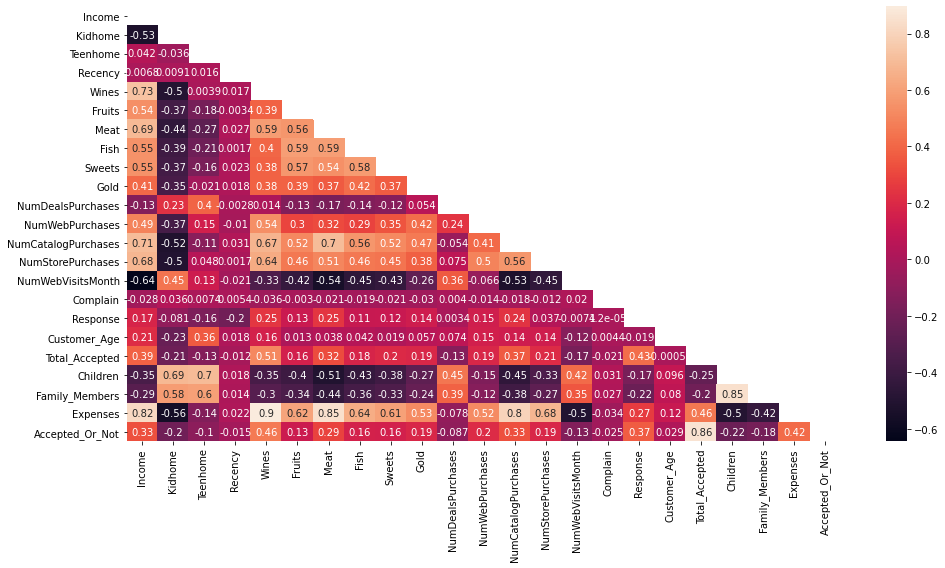

In [49]:
df_heatmap = df.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],axis=1)
plt.figure(figsize=(16,8))
sns.heatmap(df_heatmap.corr(), mask=np.triu(df_heatmap.corr()), annot=True)
plt.show()

Number of purchases has moderate positive correlation with income as expected.

Number of web visits last month is moderately inversely correlated to income.

Kidhome has somewhat weak inverse relationship with amounts spent on the products.

Expenses and income has strong positive relationship.


<h3 style = "text-align:center" >Data Preprocessing</h3>

In [50]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,Total_Accepted,Children,Family_Members,Expenses,Accepted_Or_Not
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,0,1,1617,0
2174,Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,0,2,3,27,0
4141,Graduate,Couple,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,0,2,776,0
6182,Graduate,Couple,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,0,1,3,53,0
5324,Postgraduate,Couple,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,0,1,3,422,0


For machine learning purposes, I will drop some of columns. New dataframe will be called df_ml

In [51]:
df_ml = df.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response','Total_Accepted','Accepted_Or_Not'],axis=1)

In [52]:
df_ml.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_Age,Children,Family_Members,Expenses
ID,,,,,,,,,,,,,,,,,,,,,
5524,Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,64,0,1,1617
2174,Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,67,2,3,27
4141,Graduate,Couple,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,56,0,2,776
6182,Graduate,Couple,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,37,1,3,53
5324,Postgraduate,Couple,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,40,1,3,422


In [53]:
#Creating dummy variables for categorical columns
df_ml = pd.get_dummies(df_ml,drop_first=True)
df_ml.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_Age,Children,Family_Members,Expenses,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single
ID,,,,,,,,,,,,,,,,,,,,,,
5524,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,64,0,1,1617,0,0,1
2174,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,67,2,3,27,0,0,1
4141,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,56,0,2,776,0,0,0
6182,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,37,1,3,53,0,0,0
5324,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,40,1,3,422,1,0,0


In [54]:
#scaling our data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_ml)
df_scaled

array([[0.50362487, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.39832506, 0.5       , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.62393307, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.49329488, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.60279097, 0.        , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.45658191, 0.5       , 0.5       , ..., 1.        , 0.        ,
        0.        ]])

In [55]:
#using elbow technique to find optimal number of clusters
from sklearn.cluster import KMeans
k_rng = range(1,15)
wcss = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df_scaled)
    wcss.append(km.inertia_) # km.inertia_ gives the within cluster sum of squares

Text(0, 0.5, 'WCSS')

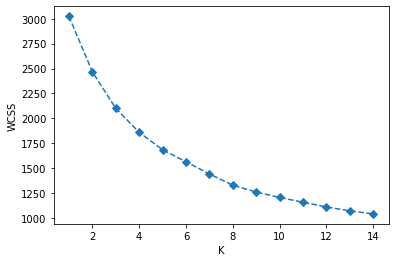

In [56]:
plt.plot(k_rng,wcss,marker='D',linestyle='--')
plt.xlabel('K')
plt.ylabel('WCSS')

None of the numbers stands out. I'll try 2,3, 4 and 5 as the number of clusters and pick one

In [57]:
#principal component analysis to reduce dimensions and visualize
from sklearn.decomposition import PCA

In [58]:
pca = PCA(0.95) # retain 95% of useful features
df_pca = pca.fit_transform(df_scaled)
df_pca.shape

(2229, 12)

In [59]:
pca.explained_variance_ratio_

array([0.2393795 , 0.19169105, 0.17593308, 0.0931425 , 0.0633256 ,
       0.06166842, 0.04423915, 0.0262311 , 0.02174347, 0.01772843,
       0.01389948, 0.01249707])

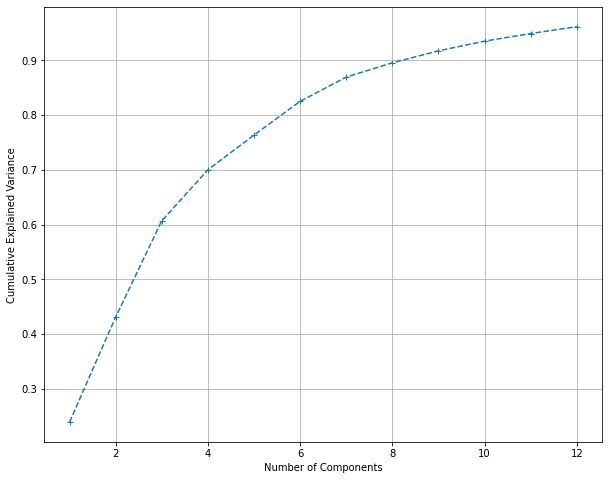

In [60]:
#checking cumulative sum of the variance to determine number of components that will be preserved
plt.figure(figsize=(10,8))
plt.plot(range(1,13),pca.explained_variance_ratio_.cumsum(),marker = '+', linestyle = '--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

Rule of thumb is preserving around 80% of the variance. 6 components should be enough to do that

In [61]:
pca = PCA(n_components=6)
scores_pca = pca.fit_transform(df_scaled)
# we'll incorporate scores in the k-means algorithm

<b> Separating the users into clusters using n_clusters= 2 </b>

In [62]:
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(scores_pca)

df_pca_kmeans_2 = pd.concat([df_ml.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_pca_kmeans_2.columns.values[-6:] = ['Component 1','Component 2', 'Component 3','Component 4','Component 5', 'Component 6']
df_pca_kmeans_2['Segment K-means PCA'] = kmeans_2.labels_
df_pca_kmeans_2.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_Age,Children,Family_Members,Expenses,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K-means PCA
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,64,0,1,1617,0,0,1,1.013730,-0.494609,0.316230,0.066373,-0.178197,-0.100758,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,67,2,3,27,0,0,1,-0.460829,-0.381883,0.692476,0.445549,0.042429,-0.193277,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,56,0,2,776,0,0,0,0.460181,-0.268409,-0.542204,-0.124688,0.065597,-0.325560,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,37,1,3,53,0,0,0,-0.551955,-0.351544,-0.234255,-0.311439,-0.035779,-0.409528,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,40,1,3,422,1,0,0,-0.194890,0.583837,-0.166269,-0.335100,-0.446454,0.234403,1


In [63]:
#checking the count in each cluster
df_pca_kmeans_2['Segment K-means PCA'].value_counts()

0    1379
1     850
Name: Segment K-means PCA, dtype: int64

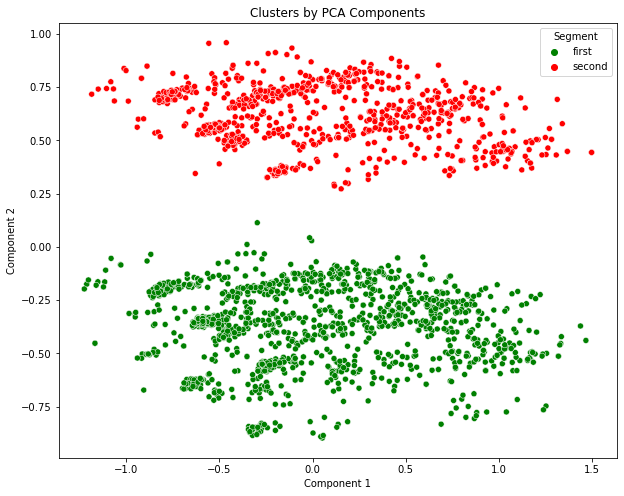

In [64]:
#changing clusters from numbers to categories
df_pca_kmeans_2['Segment'] = df_pca_kmeans_2['Segment K-means PCA'].map({
    0:'first',
    1:'second'
})

#plotting clusters on a 2d graph using the most significant components
x_axis = df_pca_kmeans_2['Component 1']
y_axis = df_pca_kmeans_2['Component 2']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis,y=y_axis, hue = df_pca_kmeans_2['Segment'], palette =['g','r'])
plt.title('Clusters by PCA Components')
plt.show()

Even though the clusters are distributed clearly, we might have an underfitting problem

<b> Separating the users into clusters using n_clusters= 3 </b>

In [65]:
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(scores_pca)

df_pca_kmeans_3 = pd.concat([df_ml.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_pca_kmeans_3.columns.values[-6:] = ['Component 1','Component 2', 'Component 3','Component 4','Component 5', 'Component 6']
df_pca_kmeans_3['Segment K-means PCA'] = kmeans_3.labels_
df_pca_kmeans_3.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_Age,Children,Family_Members,Expenses,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K-means PCA
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,64,0,1,1617,0,0,1,1.013730,-0.494609,0.316230,0.066373,-0.178197,-0.100758,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,67,2,3,27,0,0,1,-0.460829,-0.381883,0.692476,0.445549,0.042429,-0.193277,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,56,0,2,776,0,0,0,0.460181,-0.268409,-0.542204,-0.124688,0.065597,-0.325560,1
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,37,1,3,53,0,0,0,-0.551955,-0.351544,-0.234255,-0.311439,-0.035779,-0.409528,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,40,1,3,422,1,0,0,-0.194890,0.583837,-0.166269,-0.335100,-0.446454,0.234403,2


In [66]:
df_pca_kmeans_3['Segment K-means PCA'].value_counts()

0    863
1    692
2    674
Name: Segment K-means PCA, dtype: int64

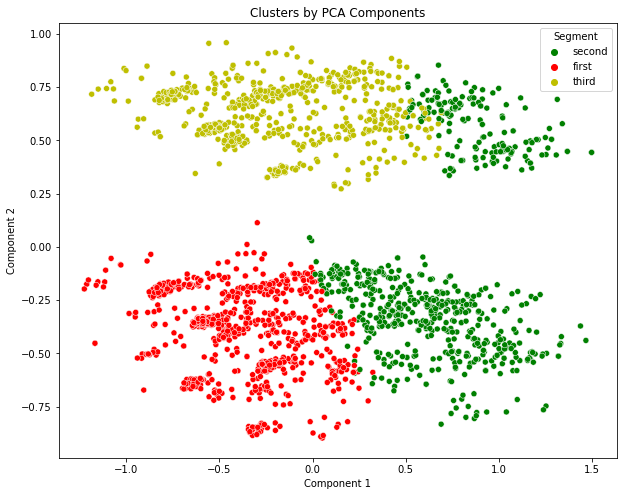

In [67]:
#changing clusters from numbers to categories
df_pca_kmeans_3['Segment'] = df_pca_kmeans_3['Segment K-means PCA'].map({
    0:'first',
    1:'second',
    2:'third'
})

#plotting clusters on a 2d graph using the most significant components
x_axis = df_pca_kmeans_3['Component 1']
y_axis = df_pca_kmeans_3['Component 2']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis,y=y_axis, hue = df_pca_kmeans_3['Segment'], palette =['g','r','y'])
plt.title('Clusters by PCA Components')
plt.show()

Groups are clear with possible minor errors

<b> Separating the users into clusters using n_clusters= 4 </b>

In [68]:
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(scores_pca)

df_pca_kmeans_4 = pd.concat([df_ml.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_pca_kmeans_4.columns.values[-6:] = ['Component 1','Component 2', 'Component 3','Component 4','Component 5', 'Component 6']
df_pca_kmeans_4['Segment K-means PCA'] = kmeans_4.labels_
df_pca_kmeans_4.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_Age,Children,Family_Members,Expenses,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K-means PCA
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,64,0,1,1617,0,0,1,1.013730,-0.494609,0.316230,0.066373,-0.178197,-0.100758,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,67,2,3,27,0,0,1,-0.460829,-0.381883,0.692476,0.445549,0.042429,-0.193277,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,56,0,2,776,0,0,0,0.460181,-0.268409,-0.542204,-0.124688,0.065597,-0.325560,3
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,37,1,3,53,0,0,0,-0.551955,-0.351544,-0.234255,-0.311439,-0.035779,-0.409528,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,40,1,3,422,1,0,0,-0.194890,0.583837,-0.166269,-0.335100,-0.446454,0.234403,2


In [69]:
#checking the count in each cluster
df_pca_kmeans_4['Segment K-means PCA'].value_counts()

1    632
3    572
0    552
2    473
Name: Segment K-means PCA, dtype: int64

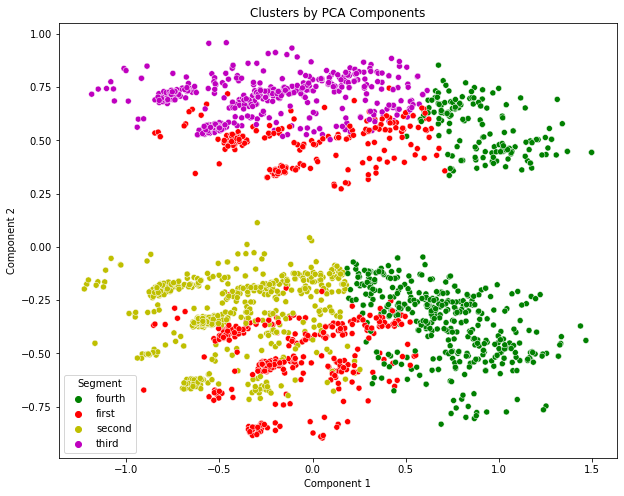

In [70]:
#changing clusters from numbers to categories
df_pca_kmeans_4['Segment'] = df_pca_kmeans_4['Segment K-means PCA'].map({
    0:'first',
    1:'second',
    2:'third',
    3:'fourth'
})

#plotting clusters on a 2d graph using the most significant components
x_axis = df_pca_kmeans_4['Component 1']
y_axis = df_pca_kmeans_4['Component 2']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis,y=y_axis, hue = df_pca_kmeans_4['Segment'], palette =['g','r','y','m'])
plt.title('Clusters by PCA Components')
plt.show()

First group looks a bit strange but still we can use 4 clusters

<b> Separating the users into clusters using n_clusters= 5 </b>

In [71]:
kmeans_5 = KMeans(n_clusters=5)
kmeans_5.fit(scores_pca)

df_pca_kmeans_5 = pd.concat([df_ml.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_pca_kmeans_5.columns.values[-6:] = ['Component 1','Component 2', 'Component 3','Component 4','Component 5', 'Component 6']
df_pca_kmeans_5['Segment K-means PCA'] = kmeans_5.labels_
df_pca_kmeans_5.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_Age,Children,Family_Members,Expenses,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K-means PCA
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,64,0,1,1617,0,0,1,1.013730,-0.494609,0.316230,0.066373,-0.178197,-0.100758,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,67,2,3,27,0,0,1,-0.460829,-0.381883,0.692476,0.445549,0.042429,-0.193277,4
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,56,0,2,776,0,0,0,0.460181,-0.268409,-0.542204,-0.124688,0.065597,-0.325560,1
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,37,1,3,53,0,0,0,-0.551955,-0.351544,-0.234255,-0.311439,-0.035779,-0.409528,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,40,1,3,422,1,0,0,-0.194890,0.583837,-0.166269,-0.335100,-0.446454,0.234403,2


In [72]:
#checking the count in each cluster
df_pca_kmeans_5['Segment K-means PCA'].value_counts()

0    529
2    528
4    448
1    379
3    345
Name: Segment K-means PCA, dtype: int64

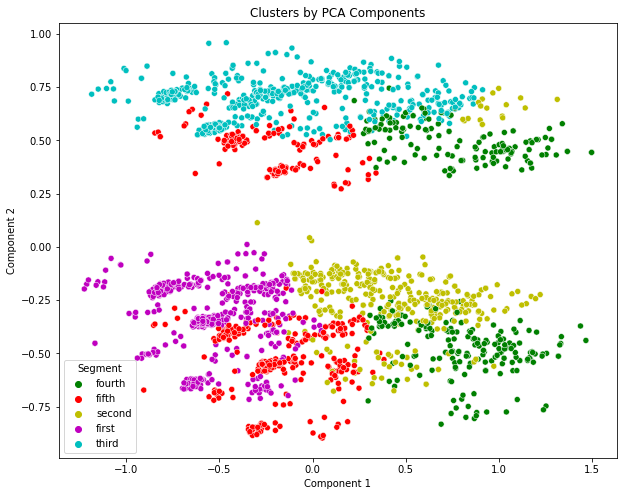

In [73]:
#changing clusters from numbers to categories
df_pca_kmeans_5['Segment'] = df_pca_kmeans_5['Segment K-means PCA'].map({
    0:'first',
    1:'second',
    2:'third',
    3:'fourth',
    4:'fifth'
})

#plotting clusters on a 2d graph using the most significant components
x_axis = df_pca_kmeans_5['Component 1']
y_axis = df_pca_kmeans_5['Component 2']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis,y=y_axis, hue = df_pca_kmeans_5['Segment'], palette =['g','r','y','m','c'])
plt.title('Clusters by PCA Components')
plt.show()

This time clusters are intertwined too much. It looks like 5 clusters aren't a good fit

<h3 style = "text-align:center" >Evaluating Models</h3>

Since we created multiple models we will inspect them closely and try to decide on the best number of clusters

<AxesSubplot:xlabel='Segment', ylabel='count'>

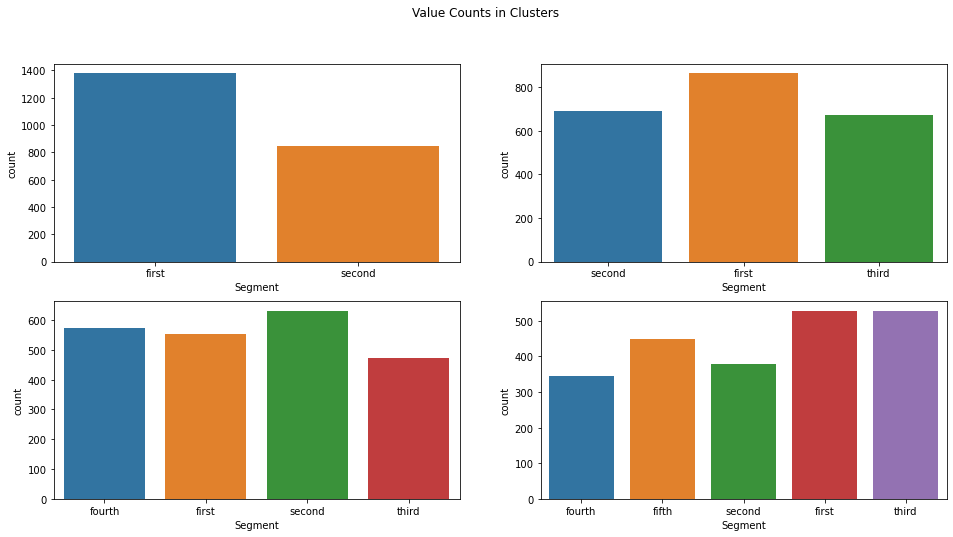

In [74]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle('Value Counts in Clusters')
sns.countplot(ax=axes[0,0], x=df_pca_kmeans_2["Segment"])
sns.countplot(ax=axes[0,1], x=df_pca_kmeans_3["Segment"])
sns.countplot(ax=axes[1,0], x=df_pca_kmeans_4["Segment"])
sns.countplot(ax=axes[1,1], x=df_pca_kmeans_5["Segment"])

Clusters are fairly closely distributed when n_clusters = 3 and n_clusters = 4

<AxesSubplot:xlabel='Expenses', ylabel='Income'>

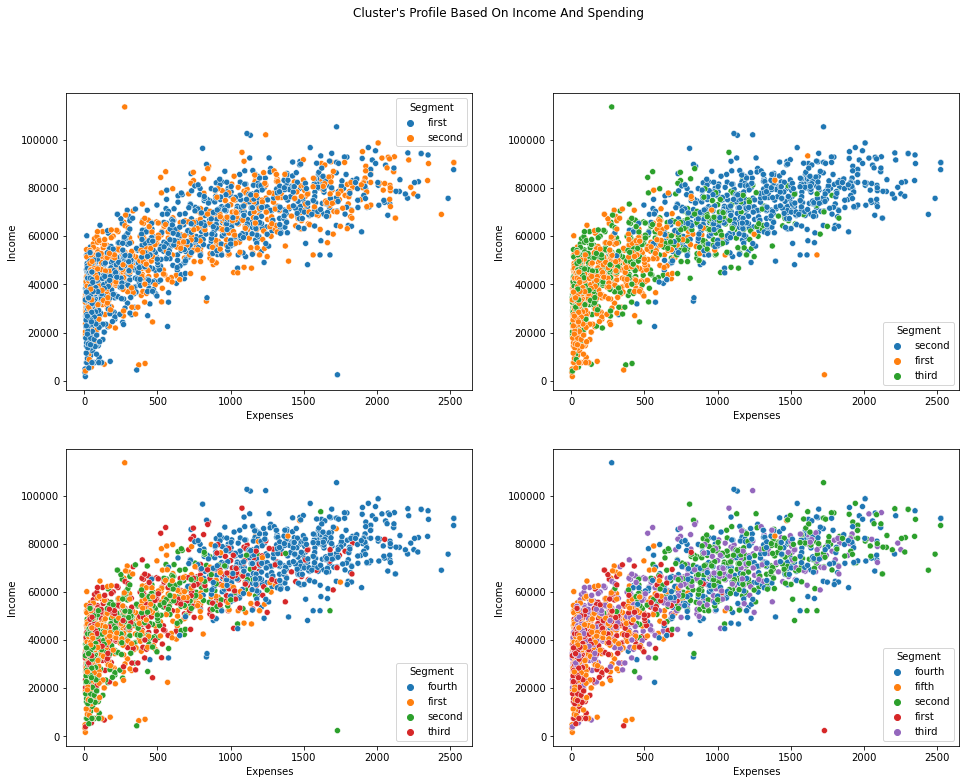

In [75]:
#Scatterplot of expenses and incomes with respect to clusters for each number of clusters
fig, axes = plt.subplots(2, 2, figsize=(16,12))
fig.suptitle("Cluster's Profile Based On Income And Spending")
sns.scatterplot(ax=axes[0,0],data = df_pca_kmeans_2,x=df_pca_kmeans_2["Expenses"], y=df_pca_kmeans_2["Income"],hue=df_pca_kmeans_2["Segment"])
sns.scatterplot(ax=axes[0,1],data = df_pca_kmeans_3,x=df_pca_kmeans_3["Expenses"], y=df_pca_kmeans_3["Income"],hue=df_pca_kmeans_3["Segment"])
sns.scatterplot(ax=axes[1,0],data = df_pca_kmeans_4,x=df_pca_kmeans_4["Expenses"], y=df_pca_kmeans_4["Income"],hue=df_pca_kmeans_4["Segment"])
sns.scatterplot(ax=axes[1,1],data = df_pca_kmeans_5,x=df_pca_kmeans_5["Expenses"], y=df_pca_kmeans_5["Income"],hue=df_pca_kmeans_5["Segment"])

At this point 2 or 5 clusters look like they don't fit our dataset. I'll continue with 4 clusters but 3 is also applicable. In second graph, we have second cluster as high income high expense class. First cluster is more like low income low expense and third cluster is in the middle. In third graph, fourth group is high income high expense while second group is low income and low expense. first and third group are between them but third group earns and spends more.

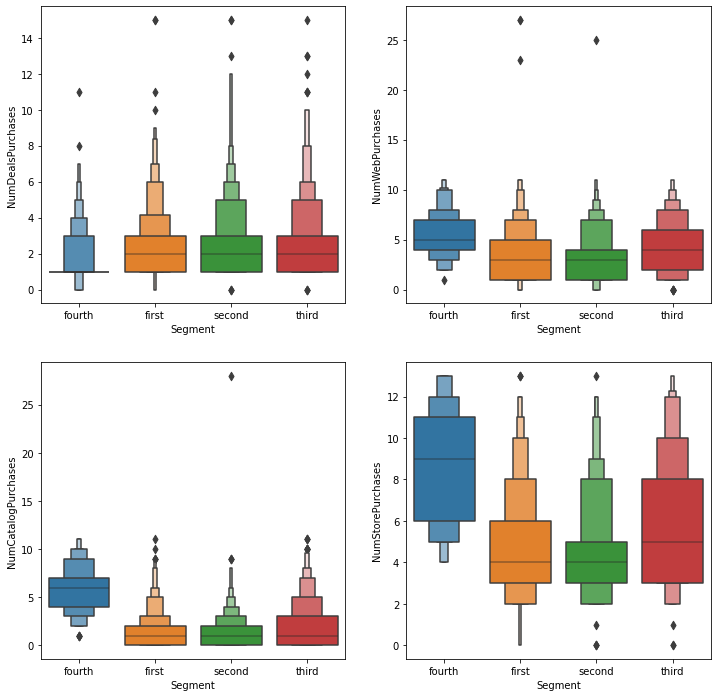

In [76]:
#Comparing clusters to purchases columns
purchases = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
i=1
plt.figure(figsize=(12,12))
for variable in purchases:   
    plt.subplot(2,2,i)
    sns.boxenplot(x=df_pca_kmeans_4['Segment'],y=df_pca_kmeans_4[variable])
    i+=1
plt.show()
    

Third and fourth clusters are more likely to purchase online and in store. Fourth cluster also tends to make catalog purchases but they are not much into deals. First group is not much attracted by deals and they don't purchase much either.

Before extracting profiles, I'll plot one more graph which shows the relation between clusters and expenses

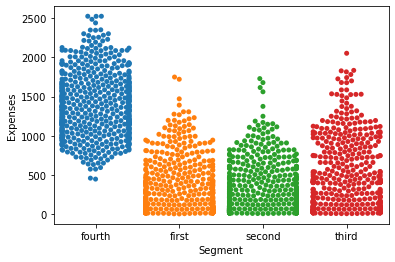

In [77]:
sns.swarmplot(x=df_pca_kmeans_4["Segment"], y=df_pca_kmeans_4["Expenses"])
plt.show()

The graph above shows that fourth group spends the most, followed by third group

<h3 style = "text-align:center" >Profiling</h3>

Let's create a new dataframe with clusters, expenses and personal information which will make it easier to extract profiles from our data

In [78]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,Total_Accepted,Children,Family_Members,Expenses,Accepted_Or_Not
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduate,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,0,1,1617,0
2174,Graduate,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,0,2,3,27,0
4141,Graduate,Couple,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,0,2,776,0
6182,Graduate,Couple,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,0,1,3,53,0
5324,Postgraduate,Couple,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,0,1,3,422,0


In [79]:
df1 = df[['Education','Marital_Status','Kidhome','Teenhome','Customer_Age','Children','Family_Members','Expenses']]
df1.reset_index(inplace=True)
df1['Cluster']=df_pca_kmeans_4['Segment']
df1.set_index('ID',inplace=True)
df1.head()

,Education,Marital_Status,Kidhome,Teenhome,Customer_Age,Children,Family_Members,Expenses,Cluster
ID,,,,,,,,,
5524,Graduate,Single,0,0,64,0,1,1617,fourth
2174,Graduate,Single,1,1,67,2,3,27,first
4141,Graduate,Couple,0,0,56,0,2,776,fourth
6182,Graduate,Couple,1,0,37,1,3,53,second
5324,Postgraduate,Couple,1,0,40,1,3,422,third


Now that our dataframe is complete, we can analyse customer personalities in clusters.

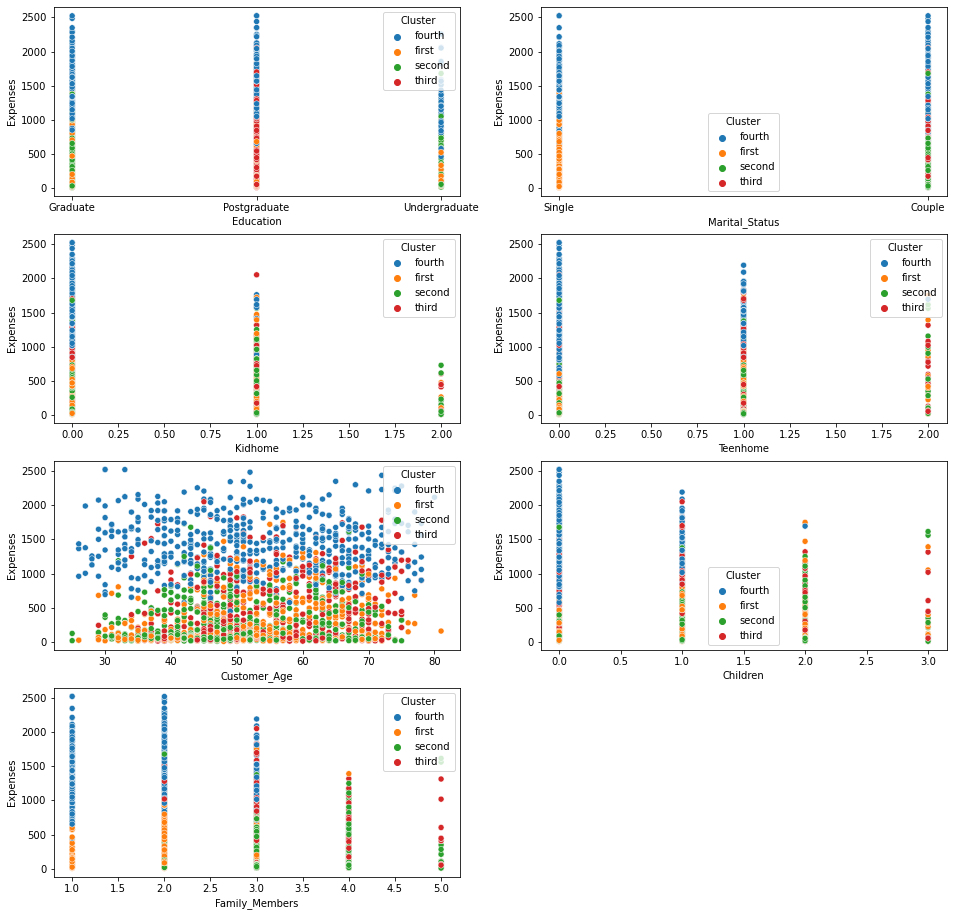

In [80]:
profile = ['Education','Marital_Status','Kidhome','Teenhome','Customer_Age','Children','Family_Members']
i=1
plt.figure(figsize=(16,16))
for variable in profile:   
    plt.subplot(4,2,i)
    sns.scatterplot(x=df1[variable],y=df1['Expenses'], hue = df1['Cluster'])
    i+=1
plt.show()

- Cluster 1 : 
              Mostly singles with 0 or 1 children.
              Low to average income with low spending
              Relatively older group
- Cluster 2 :
              Majority of this cluster does not include postgraduates
              Couples with at least one kid
              At least 3 family members
              Span all ages but relatively younger
              Low income, low spending
- Cluster 3 :
              Mostly postgraduates
              Couples that has at least one child 
              Relatively older
              Mostly 3 or 4 family members
- Cluster 4 :
              High income group with high spending
              No kids and at most 1 teenager at home
              Span all ages
              